# Tokenizer and pad_sequences

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

text1 = 'Some ThING to eat !'
text2 = 'some thing to drink .'
text3 = 'some thing'
texts=[text1,text2, text3]
print(texts)
print('========')
tokenizer = Tokenizer(num_words=100) 
tokenizer.fit_on_texts(texts)
print(tokenizer.word_counts) 
print(tokenizer.word_index) 

print('========')
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(sequences)
print('found {} unique tokens'.format(len(word_index)))

['Some ThING to eat !', 'some thing to drink .', 'some thing']
OrderedDict([('some', 3), ('thing', 3), ('to', 2), ('eat', 1), ('drink', 1)])
{'some': 1, 'thing': 2, 'to': 3, 'eat': 4, 'drink': 5}
[[1, 2, 3, 4], [1, 2, 3, 5], [1, 2]]
found 5 unique tokens


In [2]:
pad_seq = pad_sequences(sequences, maxlen=8, padding='post')
print(pad_seq)

[[1 2 3 4 0 0 0 0]
 [1 2 3 5 0 0 0 0]
 [1 2 0 0 0 0 0 0]]


# IMDB (keras)

Loading data......
25000 train sequences
25000 test sequences
Pad Sequences (samples x time
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
157/157 [==============================] - 16s 98ms/step - loss: 0.6398 - acc: 0.6272 - val_loss: 0.5451 - val_acc: 0.7284
Epoch 2/10
157/157 [==============================] - 16s 99ms/step - loss: 0.4165 - acc: 0.8263 - val_loss: 0.3815 - val_acc: 0.8400
Epoch 3/10
157/157 [==============================] - 17s 108ms/step - loss: 0.2925 - acc: 0.8821 - val_loss: 0.3572 - val_acc: 0.8538
Epoch 4/10
157/157 [==============================] - 17s 107ms/step - loss: 0.2140 - acc: 0.9206 - val_loss: 0.3831 - val_acc: 0.8458
Epoch 5/10
157/157 [==============================] - 17s 107ms/step - loss: 0.1405 - acc: 0.9506 - val_loss: 0.4701 - val_acc: 0.8092
Epoch 6/10
157/157 [==============================] - 17s 108ms/step - loss: 0.0933 - acc: 0.9693 - val_loss: 0.4446 - val_acc: 0.8530
Epoch 7/10
157/157 [=================

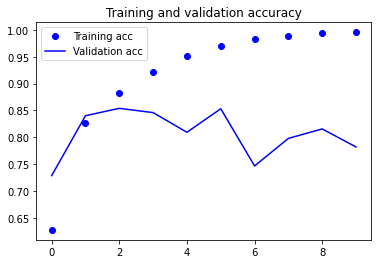

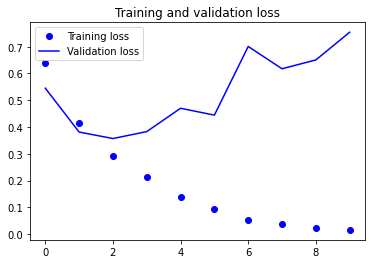

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data......')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

from tensorflow.keras.layers import Dense, Embedding

model = keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(input_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
